In [5]:
import torch

x = torch.tensor([1.0])
y = x**2
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
import torch

x = torch.tensor([1.0],requires_grad=True)
y = x**2
y.backward()

In [3]:
w = torch.tensor([1.0], requires_grad=True)
x = torch.tensor([2.0])
y = w*x
dydx = torch.autograd.grad(y, x)

RuntimeError: One of the differentiated Tensors does not require grad

In [6]:
w = torch.tensor([1.0], requires_grad=True)
x = torch.tensor([2.0], requires_grad=True)
y = w*x
dydx = torch.autograd.grad(y, x)

In [7]:
w = torch.tensor([1.5], requires_grad=True)
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = w*x
dydx = torch.autograd.grad(y, x)

RuntimeError: grad can be implicitly created only for scalar outputs

In [9]:
w = torch.tensor([1.5], requires_grad=True)
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = w*x
dydx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(x))

In [10]:
x = torch.tensor([1], requires_grad=True)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [11]:
x = torch.tensor([1.0], requires_grad=True)

In [13]:
model = torch.nn.Linear(2, 3)
x = torch.tensor([1.0, 2.0, 3.0])
model(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x3 and 2x3)

In [18]:
import numpy as np
x = torch.tensor([1.0], requires_grad=True)
x = np.array(x)

/tmp/ipykernel_35231/190733485.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [19]:
import numpy as np
x = torch.tensor([1.0], requires_grad=True)
x = x.detach().numpy()

In [32]:
zeros = torch.zeros(2)
print(zeros)

ones = torch.ones(3)
print(ones)

asdf = torch.linspace(1,2,3) # 3 values evenly spaced from 1.0 to 2.0
print(asdf)

qwer = torch.arange(1,2,0.5) # generates a 1D tensor with values starting at 1.0, incrementing by 0.5, and stopping before 2.0
print(qwer)

tensor([0., 0.])
tensor([1., 1., 1.])
tensor([1.0000, 1.5000, 2.0000])
tensor([1.0000, 1.5000])


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple linear model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.w = nn.Parameter(torch.tensor(1.0, requires_grad=True))  # weight
        self.b = nn.Parameter(torch.tensor(0.0, requires_grad=True))  # bias

    def forward(self, x):
        return self.w * x + self.b

# Create model instance
line = LinearModel()

# Define data, loss, and optimizer
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([2.0, 4.0, 6.0])
criterion = nn.MSELoss()
optimizer = optim.SGD(line.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = line(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

# Inspect the optimized parameters
print("Optimized weight (w):", line.w.item())
print("Optimized bias (b):", line.b.item())


Optimized weight (w): 1.985772967338562
Optimized bias (b): 0.03234156221151352


In [ ]:
from torch_geometric.data import Data
print("Torch-Geometric installed successfully!")

Torch-Geometric installed successfully!


12 Neural Nets: Graphs

In [47]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_dense_adj
from torch_geometric.nn import MessagePassing
from torch_geometric.nn.aggr import SumAggregation

3.2 A graph in Torch Geometric

This is an example of a graph:

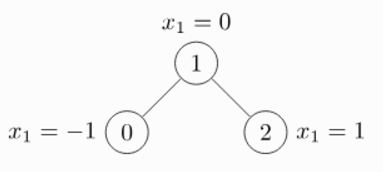

In [71]:
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
edge_index = np.array([[0, 1],
                       [1, 0],
                       [1, 2],
                       [2, 1]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)

graph = Data(x=x, edge_index=edge_index)
graph

Data(x=[3, 1], edge_index=[2, 4])

where edge_index gives pairs of (from-node, to-node) indices, and where x contains the node-values.

Inspecting the graph

You can get to know about the content and topology of your graph:

In [74]:

for key, item in graph:
    print(key)
    print(f"graph['{key}']=",item)

x
graph['x']= tensor([[-1.],
        [ 0.],
        [ 1.]])
edge_index
graph['edge_index']= tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])
y
graph['y']= 42
pos
graph['pos']= [[0.  0. ]
 [1.  0.5]
 [2.  0. ]]


In [60]:
x
graph['x']= torch.tensor([[-1.],
                   [ 0.],
                   [ 1.]])
edge_index
graph['edge_index']= torch.tensor([[0, 1, 1, 2],
                             [1, 0, 2, 1]])

3.3 Adjacency matrix

Use the to_dense_adj function to get the entire adjacency matrix from the edges:

In [61]:
adj_matrix = to_dense_adj(graph.edge_index)
adj_matrix

tensor([[[0., 1., 0.],
         [1., 0., 1.],
         [0., 1., 0.]]])

This can be used to e.g. find the spectrum of the adjacency matrix, here if it is symmetric:

In [64]:
eig = np.linalg.eigvalsh(adj_matrix)
eig

array([[-1.4142135e+00, -8.0664642e-17,  1.4142135e+00]], dtype=float32)

3.4 More info on a graph

The Data class is prepared for storing more information, e.g. a property, y, and some meta-information about the positions, pos, of the nodes in some space. Example:

In [ ]:
y = 42
pos = np.array([[0,0], [1, 0.5], [2, 0]])
graph = Data(x=x, edge_index=edge_index, y=y, pos=pos)

graph

Data(x=[3, 1], edge_index=[2, 4], y=42, pos=[3, 2])

Retrieve the property.

In [78]:
graph.y

42

And the positions can be used for plotting. You can write your own function for that, e.g.:

In [79]:
def plot_graph(ax, graph):

    # Plot the nodes:
    for idx, pos in enumerate(graph.pos):
        ax.scatter(pos[0], pos[1], c='C1', s=1000)
        ax.text(pos[0], pos[1], f'{idx}', color='w', ha='center', va='center')    
    
    # Plot the edges:
    for idx, (i1,i2) in enumerate(graph.edge_index.T):
        ax.plot([graph.pos[i1,0], graph.pos[i2,0]], [graph.pos[i1,1], graph.pos[i2,1]], c='black', zorder=0)

    ax.axis('equal')

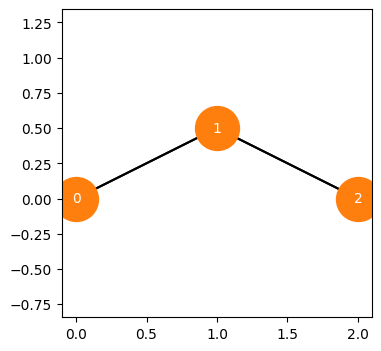

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
plot_graph(ax, graph)

3.5 Dataloader

Torch Geometric has its own Dataloader. Assume that you set up a list of three graphs, list_of_graphs, then the Dataloader is used like this:

In [84]:
list_of_graphs = [graph, graph, graph]
loader = DataLoader(list_of_graphs, batch_size=2, shuffle=True)

# iterate over it
for batch in loader:
     print(batch)

DataBatch(x=[6, 1], edge_index=[2, 8], y=[2], pos=[2], batch=[6], ptr=[3])
DataBatch(x=[3, 1], edge_index=[2, 4], y=[1], pos=[1], batch=[3], ptr=[2])


Note how the DataBatch presents itself almost as the class for the graphs, Data, did. In fact, DataBatch, is just larger, unconnected, graphs. In the example, we have 3 graphs and a batch size of 2, so the first batch is a graph with twice the size of the original graph, while the second batch is just the final graph in the dataset.

You may inspect some attributes on the first DataBatch:

In [85]:
for batch in loader:
    print('x:',batch.x)
    print('edges:',batch.edge_index)
    print('batch:',batch.batch)
    print('ptr:',batch.ptr)
    break

x: tensor([[-1.],
        [ 0.],
        [ 1.],
        [-1.],
        [ 0.],
        [ 1.]])
edges: tensor([[0, 1, 1, 2, 3, 4, 4, 5],
        [1, 0, 2, 1, 4, 3, 5, 4]])
batch: tensor([0, 0, 0, 1, 1, 1])
ptr: tensor([0, 3, 6])


Note how the batch attribute annotate each node with an index of the graph it belongs to, and the ptr gives the node-index to start from and end at if the nodes belonging to one specific graph are to be extracted. If you use standard Torch Geometric classes and functions, you will not have to manipulate the graphs at an individual level for a batch of graphs, but the knowledge of what is provided by DataBatch is important for understanding when you print out intermediate results while coding.

3.6 Why is DataBatch a larger graph?

The trick in Torch Geometric's batching is to represent the adjacency matrix of each graph appearing as a block in a large sparse block diagonal adjacency matrix:

In [86]:
for batch in loader:
    adj_matrix = to_dense_adj(batch.edge_index)
    print(adj_matrix)
    break

tensor([[[0., 1., 0., 0., 0., 0.],
         [1., 0., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0., 1.],
         [0., 0., 0., 0., 1., 0.]]])


3.7 Message passing

To illustrate message passing, consider the 3-node graph from above, but now with new node values:

In [126]:
x = torch.tensor([[5], [20], [100]], dtype=torch.float)
graph.x = x

A class for passing messages may be written like this:



In [123]:
class CustomMessagePassing(MessagePassing):
    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

and when instantiated, the type of aggregation must be defined, e.g. that messages are added up for nodes with several incoming edges, which is done with aggr='add':

In [107]:
custom_message_passing = CustomMessagePassing(aggr='add')

Now the messages can be sent:



In [108]:
custom_message_passing(graph.x, graph.edge_index)

tensor([[ 20.],
        [105.],
        [ 20.]])

where all edges (as specified by the edge_index attribute) lead to a message being sent from the source node to target node. Thus, the end-nodes in the graph, each receive the x=20. from the middle-node, while the middle node receives messages from each of the two end-nodes, x=5. and x=100., respectively, which are added up (because the class was instantiated with aggr='add'.

Note: By saying "sent ... to the target node" we are making an abstraction, because as you see, nothing is sent anywhere, only a torch tensor is constructed and written out in the cell. But each entry in the tensor represents a node in the graph, and the tensor could be used to update the node values as a layer in an nn.Module-based model.

Changing the aggregation method to multiplication it looks like this:

In [125]:
custom_message_passing = CustomMessagePassing(aggr='mul')
custom_message_passing(graph.x, graph.edge_index)

tensor([[ 20.],
        [500.],
        [ 20.]])

Other aggregation options are: 'min', 'max', and 'mean'.

In [127]:
custom_message_passing = CustomMessagePassing(aggr='mean')
custom_message_passing(graph.x, graph.edge_index)

tensor([[20.0000],
        [52.5000],
        [20.0000]])

3.8 Aggregation

As a final operation required, consider:

In [128]:
aggr = SumAggregation()
graph.x, aggr(graph.x, graph.batch)



(tensor([[  5.],
         [ 20.],
         [100.]]),
 tensor([[125.]]))

which adds up the node values, x, on all nodes for each graph. The graph.batch-argument assures that it is done correctly for batches of graphs.

In case you stumble across it: Torch Geometric has a function that does the exact same thing as a SumAggregation instance. The function is called global_add_pool and is imported and used like this:

In [129]:
from torch_geometric.nn import global_add_pool
graph_level_features = global_add_pool(graph.x, graph.batch)

Similarly, performing aggregation as a mean rather than as a sum, you might come across the MeanAggregation class and the global_mean_pool function that both do that.